In [128]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timezone
import matplotlib.pyplot as plt
from workalendar.america import Brazil
cal = Brazil()

dados = pd.read_csv('./transactions.csv')

def obterNDiaUtil(ano, mes, n):
    cal.holidays(ano)
    return cal.add_working_days(date(ano, mes, 1), n)

def configDF(dados):
    dados['data'] = pd.to_datetime(dados['data'], format='%d/%m/%Y')
    
    df = pd.merge(dados, feriados, how='left', on='data', indicator = True)
    dados['feriado'] = np.where(df['_merge'] == 'both', 1, 0)
    #df.drop('_merge', axis = 1, inplace= True)
    
    dados['dia'] = (dados['data'].dt.day)
    dados['mes'] = (dados['data'].dt.month)
    dados['ano'] = (dados['data'].dt.year)
    dados['diaDoAno'] = (dados['data'].dt.dayofyear)
    dados['dia1Ano'] = (dados['data'].dt.month == 1) & (dados['data'].dt.day == 1)
    dados['diaSemana'] = (dados['data'].dt.dayofweek)
    dados['numSemanaMes'] = ((dados['data'].dt.day - 1) // 7 + 1)
    #dados['fds'] = (dados['diaSemana'] >= 5)
    dados['diaUtil'] = ((dados['diaSemana'] < 5) & (dados.feriado == 0))
    #dados['cntDiasUteis'] = ((dados['diaSemana'] < 5) & (dados.feriado == 0))
    dados['diaUtil5'] = ((dados['diaUtil'] == True) & (dados['dia'] == 5) & (dados.feriado == 0))
    dados['diaUtil10'] = ((dados['diaUtil'] == True) & (dados['dia'] == 10) & (dados.feriado == 0))
    dados['segDia10'] = ((dados['data'].dt.dayofweek == 0) & (dados['dia'] == 10) & (dados.feriado == 0))
    dados['semanaAno'] = (dados['data'].dt.weekofyear)
    dados['inicioMes'] = (dados['data'].dt.is_month_start)
    dados['fimMes'] = (dados['data'].dt.is_month_end)
    dados['inicioSemana'] = (dados['diaSemana'] == 0)
    dados['fimSemana'] = (dados['diaSemana'] == 6)
    dados['inicioAno'] = (dados['data'].dt.is_year_start)
    dados['fimAno'] = (dados['data'].dt.is_year_end)
    dados['anoBissexto'] = (dados['data'].dt.is_leap_year)
    dados['diaDeProducao'] = (((dados.diaSemana == 1) | (dados.diaSemana == 3)) & dados.diaUtil == True)
    
    return dados

configDF(dados)
dados.dtypes

data             datetime64[ns]
totalTrsc                 int64
feriado                   int32
dia                       int64
mes                       int64
ano                       int64
diaDoAno                  int64
dia1Ano                    bool
diaSemana                 int64
numSemanaMes              int64
diaUtil                    bool
diaUtil5                   bool
diaUtil10                  bool
segDia10                   bool
semanaAno                 int64
inicioMes                  bool
fimMes                     bool
inicioSemana               bool
fimSemana                  bool
inicioAno                  bool
fimAno                     bool
anoBissexto                bool
diaDeProducao              bool
dtype: object

In [35]:
type(dados.diaUtil5.values)
dados.diaUtil5.values

array([<generator object configDF.<locals>.<genexpr> at 0x00000000065C4ED0>,
       <generator object configDF.<locals>.<genexpr> at 0x00000000065C4ED0>,
       <generator object configDF.<locals>.<genexpr> at 0x00000000065C4ED0>,
       ...,
       <generator object configDF.<locals>.<genexpr> at 0x00000000065C4ED0>,
       <generator object configDF.<locals>.<genexpr> at 0x00000000065C4ED0>,
       <generator object configDF.<locals>.<genexpr> at 0x00000000065C4ED0>],
      dtype=object)

In [20]:
cal.add_working_days(date(2019, 1, 1), 5)

datetime.date(2019, 1, 8)

In [10]:
cal.add_working_days(date(2019, 1, 1), 10)

datetime.date(2019, 1, 15)

In [24]:
pd.to_numeric(dados['dia'][:1].values)

array([1], dtype=int64)

In [22]:
#tmp['data'] = pd.to_datetime(dados['data'])
dados['data'][:1].dt.year.values.astype(int)
#for i in dados['data']:
 #   print(i[:].dt.year)
    #obterNDiaUtil(i['data'].dt.year.astype(int), i['mes'][:1].astype(int), 5)

array([2014])

In [21]:
#dados['data'].head()
#feriados['data'].head()
dados[-10:].loc[dados.diaDeProducao == True]

,data,totalTrsc,feriado,dia,mes,ano,diaDoAno,dia1Ano,diaSemana,numSemanaMes,...,segDia10,semanaAno,inicioMes,fimMes,inicioSemana,fimSemana,inicioAno,fimAno,anoBissexto,diaDeProducao
1806,2019-05-14,39546662,0,14,5,2019,134,False,1,2,...,False,20,False,False,False,False,False,False,False,True
1808,2019-05-16,36587356,0,16,5,2019,136,False,3,3,...,False,20,False,False,False,False,False,False,False,True


In [4]:
import pandas as pd
feriados = ['2015-01-01','2015-02-17','2015-04-03','2015-04-05','2015-04-21','2015-05-01','2015-06-04','2015-09-07',
        '2015-10-12','2015-11-02','2015-11-15','2015-12-25','2016-01-01','2016-02-09','2016-03-25','2016-03-27',
        '2016-04-21','2016-05-01','2016-05-26','2016-06-04','2016-09-07','2016-10-12','2016-11-02','2016-11-15',
        '2016-12-25','2017-01-01','2017-02-28','2017-04-14','2017-04-16','2017-04-21','2017-05-01','2017-05-26',
        '2017-06-15','2017-09-07','2017-10-12','2017-11-02','2017-11-15','2017-12-25','2018-01-01','2018-02-13',
        '2018-03-30','2018-04-01','2018-04-21','2018-05-01','2018-05-31','2018-09-07','2018-10-12','2018-11-02',
        '2018-11-15','2018-12-25','2019-01-01','2019-03-05','2019-04-19','2019-04-21','2019-05-01','2019-06-20',
        '2019-09-07','2019-10-12','2019-11-02','2019-11-15','2019-12-25']
feriados = pd.to_datetime(feriados, format='%Y-%m-%d')
feriados = pd.DataFrame({'data':feriados})
feriados.dtypes

data    datetime64[ns]
dtype: object

In [28]:
dados.corr().round(4)

,totalTrsc,feriado,dia,mes,ano,diaDoAno,dia1Ano,diaSemana,numSemanaMes,diaUtil,...,segDia10,semanaAno,inicioMes,fimMes,inicioSemana,fimSemana,inicioAno,fimAno,anoBissexto,diaDeProducao
totalTrsc,1.0000,-0.1760,-0.0622,-0.0399,0.5790,-0.0454,-0.0587,-0.5733,-0.0658,0.6867,...,0.0881,-0.0421,-0.0202,-0.0104,0.2712,-0.4550,-0.0587,-0.0499,-0.1700,0.2434
feriado,-0.1760,1.0000,-0.0674,-0.0189,0.0394,-0.0243,0.2973,0.0019,-0.0633,-0.2642,...,-0.0110,-0.0025,0.1650,0.0038,-0.0173,0.0105,0.2973,-0.0093,0.0152,-0.1088
dia,-0.0622,-0.0674,1.0000,0.0139,-0.0165,0.0968,-0.0877,-0.0002,0.9740,0.0182,...,-0.0401,0.0719,-0.3086,0.3081,-0.0002,0.0015,-0.0877,0.0918,0.0056,0.0094
mes,-0.0399,-0.0189,0.0139,1.0000,-0.2795,0.9965,-0.0841,0.0016,0.0155,0.0006,...,0.0393,0.9722,-0.0017,-0.0004,-0.0011,0.0001,-0.0841,0.0831,-0.0027,0.0050
ano,0.5790,0.0394,-0.0165,-0.2795,1.0000,-0.2799,0.0213,-0.0009,-0.0171,-0.0111,...,0.0014,-0.2803,0.0026,-0.0029,0.0011,-0.0017,0.0213,-0.0140,-0.1339,-0.0077
diaDoAno,-0.0454,-0.0243,0.0968,0.9965,-0.2799,1.0000,-0.0906,0.0016,0.0963,0.0020,...,0.0357,0.9737,-0.0274,0.0253,-0.0011,0.0002,-0.0906,0.0904,0.0009,0.0057
dia1Ano,-0.0587,0.2973,-0.0877,-0.0841,0.0213,-0.0906,1.0000,-0.0052,-0.0702,-0.0786,...,-0.0033,-0.0175,0.2843,-0.0096,0.0085,0.0086,1.0000,-0.0028,-0.0002,-0.0324
diaSemana,-0.5733,0.0019,-0.0002,0.0016,-0.0009,0.0016,-0.0052,1.0000,-0.0019,-0.7542,...,-0.0933,-0.0002,-0.0013,0.0003,-0.6130,0.6127,-0.0052,0.0053,0.0028,-0.3067
numSemanaMes,-0.0658,-0.0633,0.9740,0.0155,-0.0171,0.0963,-0.0702,-0.0019,1.0000,0.0199,...,-0.0339,0.0720,-0.2468,0.3246,0.0020,0.0004,-0.0702,0.0959,0.0059,0.0062
diaUtil,0.6867,-0.2642,0.0182,0.0006,-0.0111,0.0020,-0.0786,-0.7542,0.0199,1.0000,...,0.0417,-0.0002,-0.0362,-0.0050,0.2535,-0.6099,-0.0786,-0.0103,-0.0022,0.4119


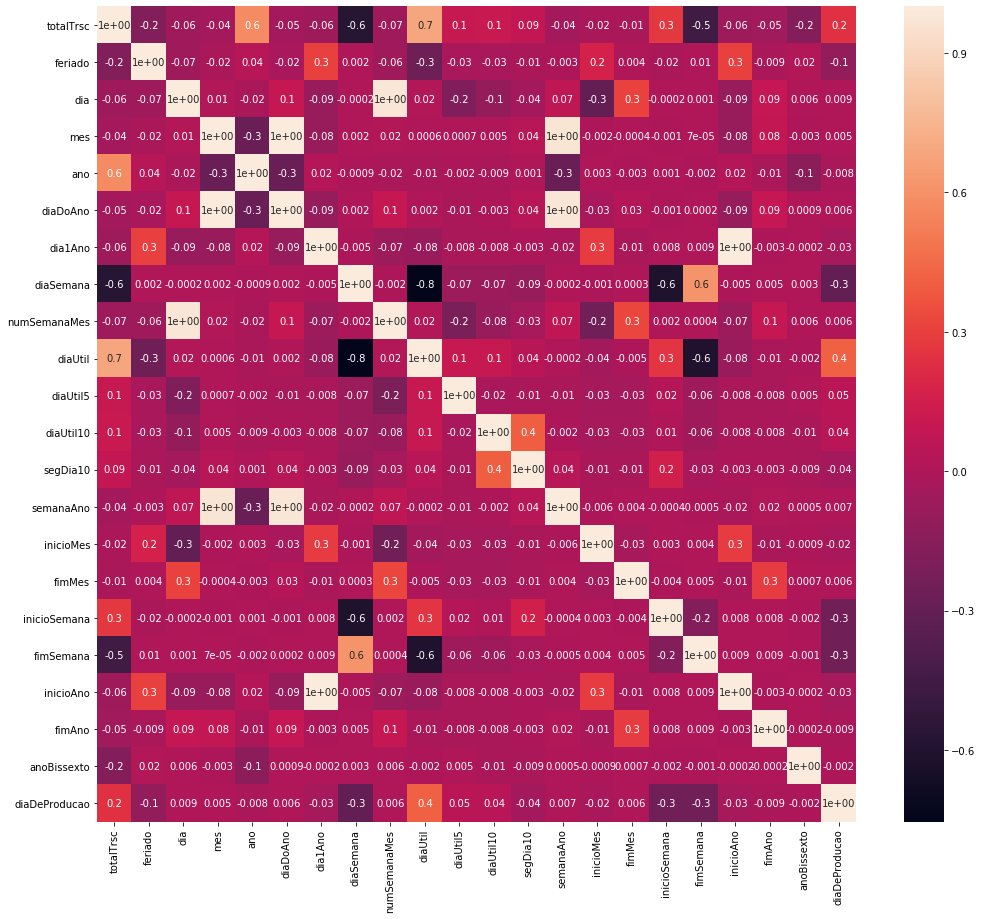

In [129]:
import seaborn as sns
plt.figure(figsize=(17,15))
sns.heatmap(dados.corr(), annot = True, fmt = '.1')

In [130]:
def configDummies(dados):
    trocar = {
        True : 1,
        False : 0
    }
    dados.dia1Ano = dados.dia1Ano.map(trocar)
    dados.diaUtil = dados.diaUtil.map(trocar)
    #dados.fds = dados.fds.map(trocar)
    dados['diaUtil5'] = dados['diaUtil5'].map(trocar)
    dados['diaUtil10'] = dados['diaUtil10'].map(trocar)
    dados['segDia10'] = dados['segDia10'].map(trocar)
    #dados.diaDoAno = dados.diaDoAno.map(trocar)
    dados.inicioMes = dados.inicioMes.map(trocar)
    dados.fimMes = dados.fimMes.map(trocar)
    dados.inicioSemana = dados.inicioSemana.map(trocar)
    dados.fimSemana = dados.fimSemana.map(trocar)
    dados.inicioAno = dados.inicioAno.map(trocar)
    dados.fimAno = dados.fimAno.map(trocar)
    dados.anoBissexto = dados.anoBissexto.map(trocar)
    dados.diaDeProducao = dados.diaDeProducao.map(trocar)
    return dados
configDummies(dados)
dados.tail()

,data,totalTrsc,feriado,dia,mes,ano,diaDoAno,dia1Ano,diaSemana,numSemanaMes,...,segDia10,semanaAno,inicioMes,fimMes,inicioSemana,fimSemana,inicioAno,fimAno,anoBissexto,diaDeProducao
1808,2019-05-16,36587356,0,16,5,2019,136,0,3,3,...,0,20,0,0,0,0,0,0,0,1
1809,2019-05-17,36779502,0,17,5,2019,137,0,4,3,...,0,20,0,0,0,0,0,0,0,0
1810,2019-05-18,10461572,0,18,5,2019,138,0,5,3,...,0,20,0,0,0,0,0,0,0,0
1811,2019-05-19,6819558,0,19,5,2019,139,0,6,3,...,0,20,0,0,0,1,0,0,0,0
1812,2019-05-20,49935265,0,20,5,2019,140,0,0,3,...,0,21,0,0,1,0,0,0,0,0


In [29]:
dados.describe().round(2)

,totalTrsc,feriado,dia,mes,ano,diaDoAno,dia1Ano,diaSemana,numSemanaMes,diaUtil,...,segDia10,semanaAno,inicioMes,fimMes,inicioSemana,fimSemana,inicioAno,fimAno,anoBissexto,diaDeProducao
count,1813.00,1813.00,1813.00,1813.00,1813.00,1813.00,1813.00,1813.0,1813.00,1813.00,...,1813.00,1813.00,1813.00,1813.00,1813.00,1813.00,1813.00,1813.00,1813.0,1813.00
mean,16326380.53,0.03,15.66,6.53,2016.40,183.30,0.00,3.0,2.69,0.69,...,0.00,26.63,0.03,0.03,0.14,0.14,0.00,0.00,0.2,0.27
std,12131602.82,0.17,8.79,3.46,1.49,105.79,0.05,2.0,1.27,0.46,...,0.06,15.13,0.18,0.18,0.35,0.35,0.05,0.05,0.4,0.45
min,549024.00,0.00,1.00,1.00,2014.00,1.00,0.00,0.0,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,6091927.00,0.00,8.00,4.00,2015.00,91.00,0.00,1.0,2.00,0.00,...,0.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
50%,13094845.00,0.00,16.00,7.00,2016.00,184.00,0.00,3.0,3.00,1.00,...,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
75%,27202236.00,0.00,23.00,10.00,2018.00,275.00,0.00,5.0,4.00,1.00,...,0.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00
max,51959223.00,1.00,31.00,12.00,2019.00,366.00,1.00,6.0,5.00,1.00,...,1.00,53.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00


In [ ]:
dados.loc[dados.numSemanaMes == 5].head()

In [30]:
df2014 = dados.loc[dados.data < '2015-01-01']
df2015 = dados.loc[(dados.data >= '2015-01-01') & (dados.data < '2016-01-01')]
df2016 = dados.loc[(dados.data >= '2016-01-01') & (dados.data < '2017-01-01')]
df2017 = dados.loc[(dados.data >= '2017-01-01') & (dados.data < '2018-01-01')]
df2018 = dados.loc[(dados.data >= '2018-01-01') & (dados.data < '2019-01-01')]
df2019 = dados.loc[dados.data >= '2019-01-01']
len(df2014), len(df2015), len(df2016), len(df2017), len(df2018), len(df2019)

(214, 365, 366, 365, 363, 140)

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


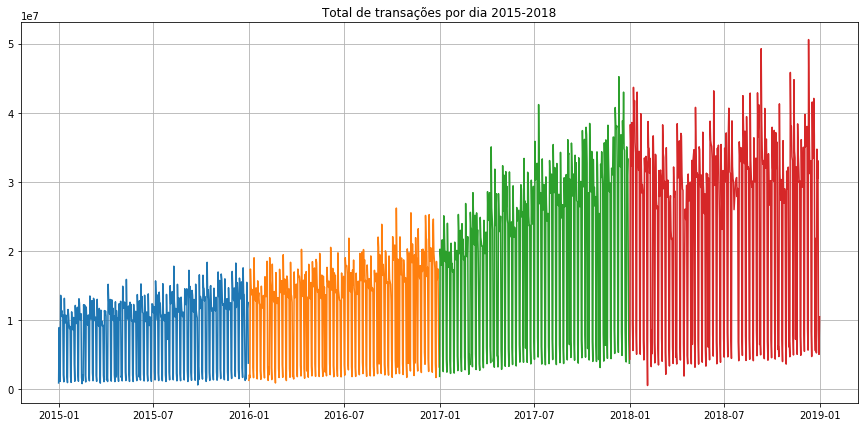

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(df2015.data, df2015.totalTrsc)
plt.plot(df2016.data, df2016.totalTrsc)
plt.plot(df2017.data, df2017.totalTrsc)
plt.plot(df2018.data, df2018.totalTrsc)
plt.title('Total de transações por dia 2015-2018')
plt.grid(True)
plt.show()

In [32]:
dfTreino, dfValido = dados.loc[dados.data < '2018-01-01'], dados.loc[(dados.data >= '2018-01-01') & (dados.data < '2019-01-01')]
len(dfTreino), len(dfValido)

(1310, 363)

In [33]:
x = dados[['dia', 'mes', 'ano', 'diaDoAno', 'dia1Ano', 'diaSemana', 'numSemanaMes', 'diaUtil', 'diaUtil5', 'diaUtil10', 'segDia10', 'semanaAno', 'inicioMes', 'fimMes', 'inicioSemana', 'fimSemana', 'inicioAno', 'fimAno', 'anoBissexto', 'feriado', 'diaDeProducao']]
y = dados['totalTrsc']
len(x), len(y)

(1813, 1813)

In [ ]:
x_treino, y_treino = dfTreino.drop(['data', 'totalTrsc'], axis=1).values, dfTreino.totalTrsc.values
x_valido, y_valido = dfValido.drop(['data','totalTrsc'], axis=1).values, dfValido.totalTrsc.values
len(dfTreino), len(dfValido)

In [131]:
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33, random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

Treinaremos com 1214 elementos e testaremos com 599 elementos


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

print("A acurácia foi %d" % accuracy_score(y_teste, previsoes))

In [ ]:
from sklearn.svm import SVC

modelo = SVC()
modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)

acuracia = accuracy_score(y_teste, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(x_treino, y_treino)
print('R² = {}'.format(lr_model.score(x_treino, y_treino).round(3)))
y_previsto = lr_model.predict(x_teste)
print('R² = %s' % metrics.r2_score(y_teste, y_previsto).round(3))

R² = 0.864
R² = 0.856


In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor()
lgb_model = LGBMRegressor()
models = (xgb_model, lgb_model)

def train_models(x, y):
    for model in models:
        model.fit(x, y)

train_models(x_treino, y_treino)

xgb_model.score(x_treino, y_treino), lgb_model.score(x_treino, y_treino)

c:\users\ramon.nascimento\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:57:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.9730701237260015, 0.9855121866343785)

In [134]:
xgb_pred = xgb_model.predict(x_teste)
lgb_pred = lgb_model.predict(x_teste)
lr_pred = lr_model.predict(x_teste)
blend_pred = (xgb_pred + lgb_pred) / 2
mean_squared_error(y_teste, xgb_pred), mean_squared_error(y_teste, lgb_pred), mean_squared_error(y_teste, blend_pred)

(6578145788961.016, 4563313646889.934, 5108894567915.267)

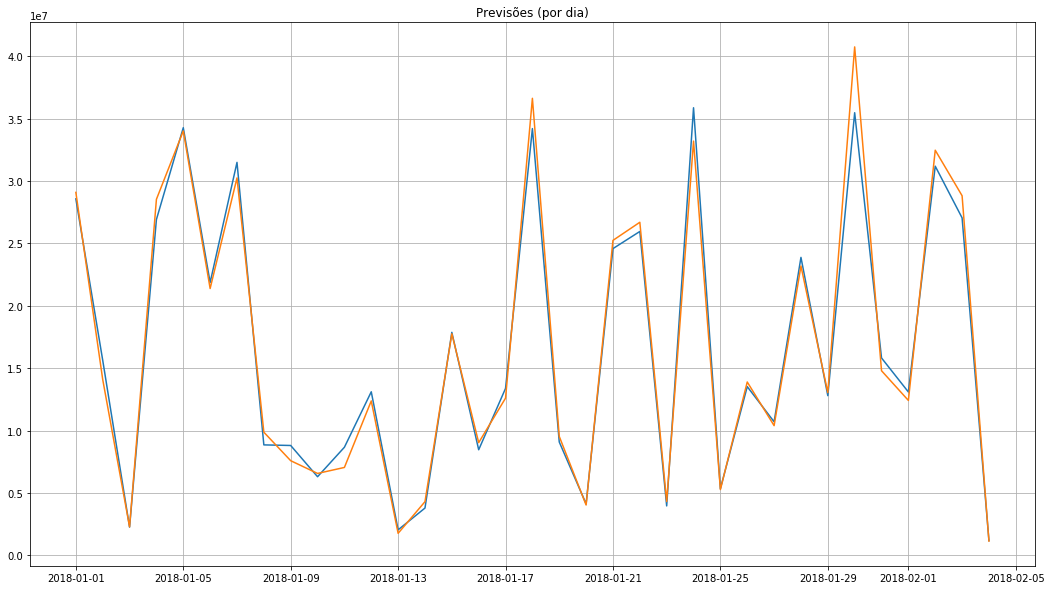

In [135]:
dfTmp = dados.loc[(dados.data >= '2018-10-01') & (dados.data < '2018-11-16')]
plt.figure(figsize=(18, 10))
plt.plot(dfValido.data[:35], y_teste[:35])
#plt.plot(dfValido.data[12:], xgb_pred)
plt.plot(dfValido.data[:35], lgb_pred[:35])
#plt.plot(dfValido.data[:35], blend_pred[:35])
#plt.plot(dfValido.data[:35], lr_pred[:35])
plt.title('Previsões (por dia)')
plt.grid(True)
plt.show()

In [136]:
dia = [24,25,26,27,28,29,30,1,2,3,4,5,6,7]
mes = [6,6,6,6,6,6,6,6,7,7,7,7,7,7]
ano = [2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019]
diaDoAno = [175,176,177,178,179,180,181,182,183,184,185,186,187,188]
dia1Ano = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
diaSemana = [0,1,2,3,4,5,6,0,1,2,3,4,5,6]
numSemanaMes = [4,4,4,4,4,4,5,1,1,1,1,1,1]
diaUtil = [1,1,1,1,1,0,0,1,1,1,1,1,0,0]
#fds = 0
diaUtil5 = [0,0,0,0,0,0,0,0,0,0,0,0,0,1]
diaUtil10 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
segDia10 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
semanaAno = [26,26,26,26,26,26,27,27,27,27,27,27,28]
inicioMes = [0,0,0,0,0,0,0,1,0,0,0,0,0,0]
fimMes = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
inicioSemana = [1,0,0,0,0,0,0,1,0,0,0,0,0,0]
fimSemana = [0,0,0,0,0,0,1,0,0,0,0,0,0,1]
inicioAno = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
fimAno = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
anoBissexto = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
feriado = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
diaDeProducao = [0,1,0,1,0,0,0,0,1,0,1,0,0,0]

entrada = []
for i in range(13):
    entrada.append([[dia[i], mes[i], ano[i], diaDoAno[i], dia1Ano[i], diaSemana[i], numSemanaMes[i], diaUtil[i], diaUtil5[i], diaUtil10[i], segDia10[i], semanaAno[i], inicioMes[i], fimMes[i], inicioSemana[i], fimSemana[i], inicioAno[i], fimAno[i], anoBissexto[i], feriado[i], diaDeProducao[i]]])
    #entrada[i].reshape(-1,1)
    print('Dia: {:02d} LGBRegression: {}'.format(dia[i], int(lgb_model.predict(entrada[i])[0])))
    #print('Dia: {:02d} XGBRegression: {}'.format(dia[i], int(xgb_model.predict(entrada[i])[0])))
    print('Dia: {:02d} LinearRegression: {}'.format(dia[i], int(lr_model.predict(entrada[i])[0])))

#entrada = [[dia, mes, ano, diaDoAno, dia1Ano, diaSemana, numSemanaMes, diaUtil, diaUtil5, diaUtil10, segDia10, semanaAno, inicioMes, fimMes, inicioSemana, fimSemana, inicioAno, fimAno, anoBissexto, feriado, diaDeProducao]] 
#print('LGBRegression: {0:.2f}'.format(lgb_model.predict(entrada)[0]))
#print('XGBRegression: {0:.2f}'.format(xgb_model.predict(entrada)[0]))
#print('LinearRegression: {0:.2f}'.format(lr_model.predict(entrada)[0]))
#print(dados.loc[dados.data == '2018-06-26'].totalTrsc.values)
#print(dados.loc[dados.data == '2017-06-26'].totalTrsc.values)
#print(dados.loc[dados.data == '2016-06-26'].totalTrsc.values)
#print(dados.loc[dados.data == '2015-06-26'].totalTrsc.values)
#print(entrada[0])

Dia: 24 LGBRegression: 38489308
Dia: 24 LinearRegression: 36750938
Dia: 25 LGBRegression: 37342373
Dia: 25 LinearRegression: 33299542
Dia: 26 LGBRegression: 36465228
Dia: 26 LinearRegression: 33595721
Dia: 27 LGBRegression: 35467044
Dia: 27 LinearRegression: 33400244
Dia: 28 LGBRegression: 36586337
Dia: 28 LinearRegression: 33696423
Dia: 29 LGBRegression: 8553292
Dia: 29 LinearRegression: 17505081
Dia: 30 LGBRegression: 6931948
Dia: 30 LinearRegression: 15073464
Dia: 01 LGBRegression: 41995734
Dia: 01 LinearRegression: 46453834
Dia: 02 LGBRegression: 40316847
Dia: 02 LinearRegression: 35001515
Dia: 03 LGBRegression: 40324455
Dia: 03 LinearRegression: 35297693
Dia: 04 LGBRegression: 40026646
Dia: 04 LinearRegression: 35102217
Dia: 05 LGBRegression: 43706822
Dia: 05 LinearRegression: 35398395
Dia: 06 LGBRegression: 10479642
Dia: 06 LinearRegression: 19306076


In [87]:
for i in range(13):
    entrada.append([[dia[i], mes[i], ano[i], diaDoAno[i], dia1Ano[i], diaSemana[i], numSemanaMes[i], diaUtil[i], diaUtil5[i], diaUtil10[i], segDia10[i], semanaAno[i], inicioMes[i], fimMes[i], inicioSemana[i], fimSemana[i], inicioAno[i], fimAno[i], anoBissexto[i], feriado[i], diaDeProducao[i]]])

[[24, 6, 2019, 175, 0, 0, 4, 1, 0, 0, 0, 26, 0, 0, 1, 0, 0, 0, 0, 0, 0]]
[[25, 6, 2019, 176, 0, 1, 4, 1, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
[[26, 6, 2019, 177, 0, 2, 4, 1, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[27, 6, 2019, 178, 0, 3, 4, 1, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
[[28, 6, 2019, 179, 0, 4, 4, 1, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[29, 6, 2019, 180, 0, 5, 4, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[30, 6, 2019, 181, 0, 6, 5, 0, 0, 0, 0, 27, 0, 0, 0, 1, 0, 0, 0, 0, 0]]
[[1, 6, 2019, 182, 0, 0, 1, 1, 0, 0, 0, 27, 1, 0, 1, 0, 0, 0, 0, 0, 0]]
[[2, 7, 2019, 183, 0, 1, 1, 1, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
[[3, 7, 2019, 184, 0, 2, 1, 1, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[4, 7, 2019, 185, 0, 3, 1, 1, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
[[5, 7, 2019, 186, 0, 4, 1, 1, 0, 0, 0, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[6, 7, 2019, 187, 0, 5, 1, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [39]:
from statsmodels.stats.weightstats import zconfint

zconfint(dados.totalTrsc)

(15767952.287342573, 16884808.76615991)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

In [ ]:
trscDf = pd.read_csv('./transactions.csv')
trscDf['data'] = pd.to_datetime(trscDf['data'], format='%d/%m/%Y')
trscDf.head()

In [ ]:
trscDf['data'].min()

In [ ]:
trscDf['data'].max()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(trscDf.totalTrsc, freq=7)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [ ]:
trscDf = trscDf.set_index('data')
trscDf.index

In [ ]:
y = trscDf['totalTrsc'].resample('MS').mean()

In [ ]:
y['2017':]

In [ ]:
y.plot(figsize=(15,6))
plt.show()

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [ ]:
from fbprophet import Prophet